<a href="https://colab.research.google.com/github/Junjaee/Study/blob/main/SQL/SQL_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SQL 연습문제1

# 1. 1981년에 입사한 사람의 이름, 업무, 입사일자 조회
SELECT ename, job, HIREDATE FROM emp WHERE HIREDATE BETWEEN 19810101 AND 19811231;

# 2. 사번이 7902, 7788, 7566인 사원의 이름, 업무, 급여, 입사일자 조회
SELECT ename, job, sal, HIREDATE FROM emp WHERE EMPNO IN (7902, 7788, 7566);

# 3. 업무가 manager, clerk, analyst가 아닌 직원의 이름, 업무, 급여, 부서번호 조회
SELECT ename, job, sal, DEPTNO FROM emp WHERE job NOT IN ('manager','clerk','analyst');

# 4. 업무가 president 또는 salesman이고 급여가 1500인 직원의 이름, 급여, 업무, 부서번호 조회
SELECT ename, sal, job, DEPTNO FROM emp WHERE job IN ('presidient','salesman') AND sal = 1500;

# 5. 가장 최근에 입사한 직원의 이름, 부서, 업무, 입사일자 조회
SELECT ename, DEPTNO, job, HIREDATE FROM emp WHERE hiredate = (SELECT MAX(HIREDATE) FROM emp);

# 6. 같은 부서내에서 같은 업무를 하는 직원의 급여가 많은 순으로 조회
SELECT ename, job, deptno, sal FROM emp ORDER BY deptno, job, sal DESC;
# SELECT ename, deptno, job, sal FROM emp WHERE ename NOT IN (SELECT ename FROM emp GROUP BY deptno, job HAVING COUNT(*) = 1) ORDER BY deptno, job, sal DESC;
# 부서내에 같은 업무를 가진 사람이 없을 경우 제외하는 식

# 7. 커미션이 급여보다 10%이상 많은 직원의 급여가 많은 순으로 조회
SELECT ename, job, deptno, sal, comm FROM emp WHERE comm >= sal*1.1 ORDER BY sal DESC; 

# 8. 이름에 L자가 2개 있고 30번 부서이거나 직속상사가 7782인 직원의 이름, 부서, 직속상사 조회
SELECT ename, deptno, mgr FROM emp WHERE ename LIKE '%L%L%' AND (deptno = 30 OR mgr = 7782)

In [ ]:
# SQL 연습문제2

# 1. 오늘부터 12월 25일까지 몇일이 남았는가?
SELECT datediff(20211225, now());

# 2. 현재까지 근무한 직원들의 근무일수를 몇주 몇일로 조회.(단, 근무일수가 많은 사람 순으로 조회)
SELECT ename '이름', hiredate '입사일', TIMESTAMPDIFF(WEEK, hiredate, NOW()) '몇주', mod(TIMESTAMPDIFF(DAY, hiredate, NOW()), 7) '몇일' FROM emp ORDER BY (NOW()-hiredate) desc;

# 3. 10번 부서 직원들 중 현재까지의 근무월수를 계산해서 조회
SELECT ename '이름', hiredate '입사일', TIMESTAMPDIFF(MONTH, hiredate, NOW()) '현재까지의 근무월수' FROM emp WHERE deptno = 10;

# 4. 20번 부서 직원들 중 입사일자로부터 13개월이 지난 후의 날짜를 조회
SELECT ename '이름', hiredate '입사일', DATE_ADD(hiredate, interval 13 MONTH) '입사일자로부터 13개월 후' FROM emp WHERE deptno = 20;
# date_format( , )을 이용하면 날짜의 형식도 지정해 줄 수 있다


# 5. 모든 직원에 대해 입사한 달의 근무일수를 조회
SELECT ename '이름', hiredate '입사일', (datediff(last_day(hiredate), hiredate) + 1) '입사한 달의 근무일수' FROM emp;

# 6. 현재 급여에 15%가 증가된 급여를 계산하여 사번, 이름, 급여, 증가된 급여를 조회(단, 급여는 반올림하여 적용한다.)
SELECT empno '사번', ename '이름', sal '급여', round(sal*1.15) '증가된 급여' FROM emp; 

# 7. 이름, 입사일, 입사일로부터 현재까지의 월수, 급여, 급여 총계를 조회
SELECT ename '이름', HIREDATE '입사일', TIMESTAMPDIFF(MONTH, hiredate, NOW()) '입사일로부터 현재까지의 월수', sal '급여', sal*TIMESTAMPDIFF(MONTH, hiredate, NOW()) '급여 총계' FROM emp; 

# 8. 업무가 analyst이면 급여를 10%증가시키고 clerk이면 15%, manager이면 20%증가 시켜서 이름, 업무, 급여, 증가된 급여를 조회
SELECT ename '이름', job '업무', sal'급여', 
  CASE
    WHEN job = 'analyst' THEN round(sal*1.1)
    WHEN job = 'clerk' THEN round(sal*1.15)
    WHEN job = 'manager' THEN round(sal*1.2)
    ELSE sal
  END as '증가된 급여'
FROM emp

# 9. 이름의 첫글자가 k보다 크고 y보다 작은 직원의 이름, 부서, 업무를 조회하시오.
SELECT ename '이름', deptno '부서', job '업무' FROM emp WHERE SUBSTR(ename, 1, 1) > 'k' AND SUBSTR(ename, 1, 1) < 'y';

In [ ]:
# SQL 연습문제3

# 1. Blake와 같은 부서에 있는 모든 직원의 사번, 이름, 입사일자 조회
SELECT empno '사번', ename '이름', hiredate '입사일자' FROM emp WHERE deptno = (SELECT deptno FROM emp WHERE ename = 'Blake');

# 2. SELECT empno, ename, deptno, sal, comm FROM emp
# WHERE (sal, comm) IN(SELECT sal, comm FROM emp WHERE deptno=30);
# 이 쿼리에서 보너스가 null인 사람도 출력될 수 있도록 수정하시오.
SELECT empno '사번', ename '이름', deptno '부서', sal '급여', comm '보너스' FROM emp
WHERE (sal, coalesce(comm, 0)) IN (SELECT sal, coalesce(comm, 0) FROM emp WHERE deptno=30);

# 3. 평균 급여 이상을 받는 직원들의  사번, 이름을 조회. 단, 급여가 많은 순으로 정렬
SELECT empno '사번', ename '이름' FROM emp WHERE sal >= (SELECT avg(sal) FROM emp) ORDER BY sal DESC;

# 4. 이름에 T자가 들어가는 직원이 근무하는 부서에서 근무하는 직원의 사번,이름, 급여 조회
SELECT empno '사번', ename '이름', sal '급여' FROM emp WHERE deptno IN (SELECT deptno FROM emp WHERE ename LIKE '%T%');

# 5. 부서의 위치가 dallas인 모든 직원에 대해 사번, 이름, 급여, 업무조회 -> dept 테이블 참고
SELECT empno '사번', ename '이름', sal '급여', job '업무' FROM emp WHERE deptno = (SELECT deptno FROM dept where LOC = 'dallas');

# 6. King에게 보고하는 모든 직원의 이름과 부서, 업무, 급여를 조회
SELECT ename '이름', deptno '부서', job '업무', sal '급여' FROM emp WHERE MGR = (SELECT empno FROM emp WHERE ename = 'KING');

# 7. 급여가 30번 부서의 최저급여보다 높은 직원의 사번, 이름, 급여 조회
SELECT empno '사번', ename '이름', sal '급여' FROM emp WHERE sal > (SELECT MIN(sal) FROM emp WHERE deptno = 30);

# 8. 10번부서에서 30번 부서의 직원과 같은 업무를 하는 직원의 이름과 업무를 조회
SELECT ename '이름', job '업무' FROM emp WHERE job IN (SELECT distinct job FROM emp WHERE deptno = 30) AND deptno = 10;


In [ ]:
# SQL 연습문제4
 
# 1. 말단 사원(부하 직원이 없는 사람)의 사번, 이름, 업무, 부서번호, 근무지를 조회
# --> 매니저가 아니고 평균 연봉이 가장 적은 업무를 갖고 있는 사람 중 가장 늦게 입사한 사람
SELECT empno, ename, job, emp.deptno, loc FROM emp JOIN dept
ON emp.deptno = dept.deptno
WHERE empno NOT IN (SELECT COALESCE(MGR,0) FROM emp)
AND job = (SELECT job FROM emp GROUP BY job ORDER BY AVG(sal) LIMIT 1)
ORDER BY hiredate desc LIMIT 1;

# --> Manager가 아니고 입사일이 가장 늦은 사람
SELECT empno, ename, job, emp.deptno, loc FROM emp JOIN dept
ON emp.deptno = dept.deptno
WHERE empno NOT IN (SELECT COALESCE(MGR,0) FROM emp)
ORDER BY hiredate desc LIMIT 1;

# --> Manager가 아닌 사람
SELECT empno, ename, job, emp.deptno, loc FROM emp JOIN dept
ON emp.deptno = dept.deptno
WHERE empno NOT IN (SELECT COALESCE(MGR,0) FROM emp)
ORDER BY hiredate desc;


# 2. SELF JOIN 예제
# - 한 권의 책에 대해 두 명 이상의 작가가 쓴 책 조회
    책이름  작가명  작가명
SELECT a.title, a.author, b.author FROM tblbook a 
INNER JOIN tblbook b
ON a.title = b.title AND a.author < b.author;

#- 한 권의 책에 대해 세 명의 작가가 쓴 책 조회
   책이름  작가명  작가명  작가명
SELECT a.title, a.author, b.author, c.author FROM tblbook a
INNER JOIN tblbook b 
ON a.title = b.title AND a.author < b.author
INNER JOIN tblbook c
ON b.title = c.title AND b.author < c.author;

============================    
  CREATE TABLE tblBook(
                            author  varchar(20),
                            title varchar(20)
    );
 
    INSERT INTO tblBook VALUES('최주현', '하늘과 땅');
    INSERT INTO tblBook VALUES('최주현', '바다');
    INSERT INTO tblBook VALUES('유은정', '바다');
    INSERT INTO tblBook VALUES('박성우', '문');
    INSERT INTO tblBook VALUES('최주현', '문');
    INSERT INTO tblBook VALUES('박성우', '천국');
    INSERT INTO tblBook VALUES('최지은', '천국');
    INSERT INTO tblBook VALUES('최주현', '천국');
    INSERT INTO tblBook VALUES('박성우', '고슴도치');
    INSERT INTO tblBook VALUES('서금동', '나');
============================    


SQL 연습문제5

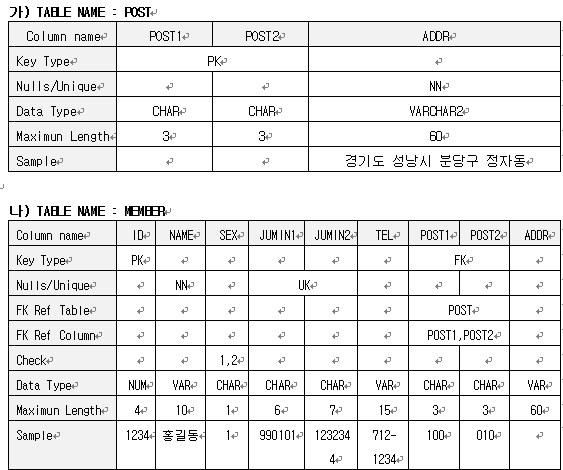

In [ ]:
# SQL 연습문제5

CREATE TABLE POST(
  POST1    CHAR(3),
  POST2    CHAR(3),
  ADDR     VARCHAR(60)  NOT NULL,
  CONSTRAINT pk_post PRIMARY KEY(POST1, POST2)
);

CREATE TABLE MEMBER(
  ID      int(4),
  Name    VARCHAR(10) NOT NULL,
  SEX     CHAR(1),
  JUMIN1  CHAR(6),
  JUMIN2  CHAR(7),
  TEL     VARCHAR(15),
  POST1   CHAR(3),
  POST2   CHAR(3),
  ADDR    VARCHAR(60),
  CONSTRAINT pk_id PRIMARY KEY(ID),
  CONSTRAINT uk_jumin1 UNIQUE(JUMIN1),
  CONSTRAINT uk_jumin2 UNIQUE(JUMIN2),
  CONSTRAINT fk_id FOREIGN KEY(POST1, POST2) REFERENCES POST(POST1, POST2);
);

